In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [57]:
df = pd.read_csv("Train.csv")

In [58]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [59]:
df.shape

(10999, 12)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [61]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [62]:
print("Number of Unique Values: \n")
print(df.nunique())

Number of Unique Values: 

ID                     10999
Warehouse_block            5
Mode_of_Shipment           3
Customer_care_calls        6
Customer_rating            5
Cost_of_the_Product      215
Prior_purchases            8
Product_importance         3
Gender                     2
Discount_offered          65
Weight_in_gms           4034
Reached.on.Time_Y.N        2
dtype: int64


In [63]:
print("Unique Values:\n")
for i in range(len(df.nunique())):
    if df.nunique()[i] < 10:
        print("- ", df.nunique().index[i], ": ", sorted(df.iloc[:, i].unique()), sep='')

Unique Values:

- Warehouse_block: ['A', 'B', 'C', 'D', 'F']
- Mode_of_Shipment: ['Flight', 'Road', 'Ship']
- Customer_care_calls: [2, 3, 4, 5, 6, 7]
- Customer_rating: [1, 2, 3, 4, 5]
- Prior_purchases: [2, 3, 4, 5, 6, 7, 8, 10]
- Product_importance: ['high', 'low', 'medium']
- Gender: ['F', 'M']
- Reached.on.Time_Y.N: [0, 1]


In [64]:
df.rename({'Reached.on.Time_Y.N':'Reached_on_Time'}, axis=1, inplace=True)
df['Reached_on_Time'].replace({'No': 1, 'Yes': 0 }, inplace=True)

In [65]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [66]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached_on_Time
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [67]:
for x in df.columns :
    if (df[x].dtypes == 'object') & (df[x].nunique() <= 15) :
        print(x)
        print(df[x].unique())

Warehouse_block
['D' 'F' 'A' 'B' 'C']
Mode_of_Shipment
['Flight' 'Ship' 'Road']
Product_importance
['low' 'medium' 'high']
Gender
['F' 'M']


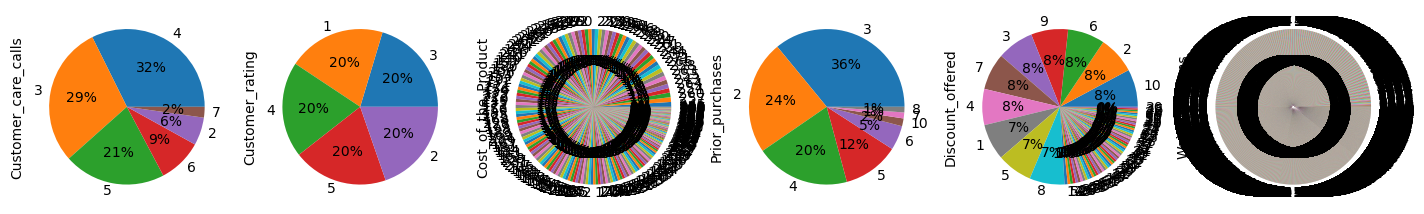

In [69]:
#Categorical Data Analysis
Data = df[['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']]
i = 1
plt.figure(figsize=(150,200))
for col in Data:
    plt.subplot(50,50,i)
    x=Data[col].value_counts()
    plot = x.plot.pie(fontsize=10, autopct='%1.0f%%')
    i +=1

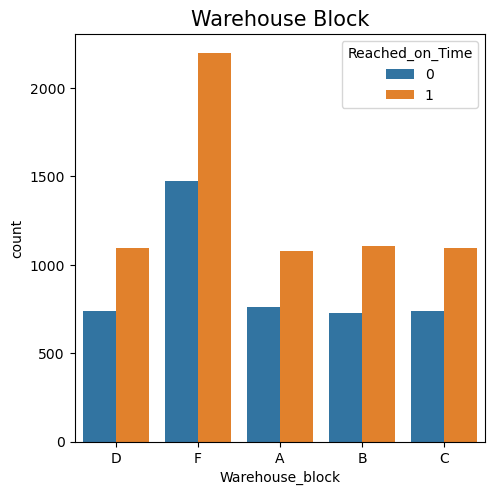

In [17]:
plt.figure(figsize=(18, 18))

plt.subplot(3, 3, 1)
sns.countplot(x='Warehouse_block', hue='Reached_on_Time', data=df)
plt.title('Warehouse Block', fontsize=15)
plt.show()


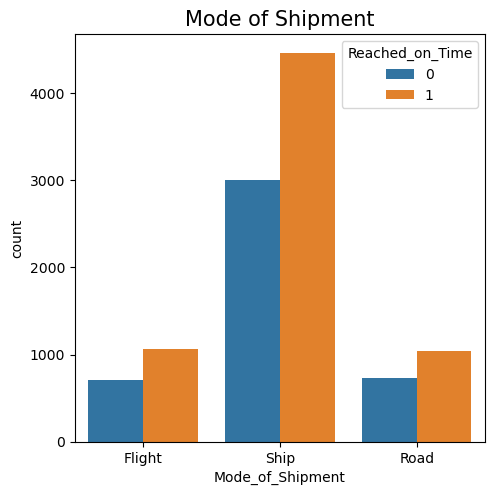

In [50]:
plt.figure(figsize=(18, 18))
plt.subplot(3, 3, 2)
sns.countplot(x='Mode_of_Shipment', hue='Reached_on_Time', data=df)
plt.title('Mode of Shipment', fontsize=15)
plt.show()

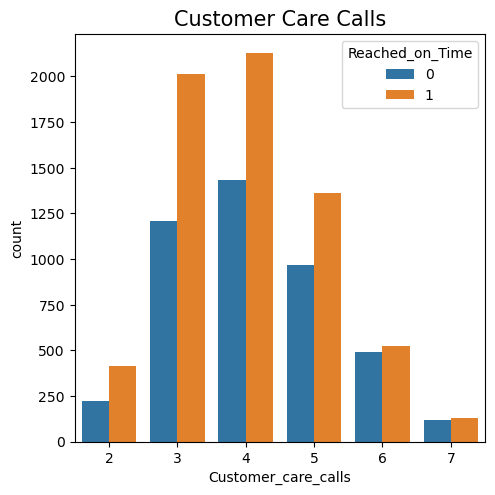

In [51]:
plt.figure(figsize=(18, 18))
plt.subplot(3, 3, 3)
sns.countplot(x='Customer_care_calls', hue='Reached_on_Time',  data=df)
plt.title('Customer Care Calls', fontsize=15)
plt.show()

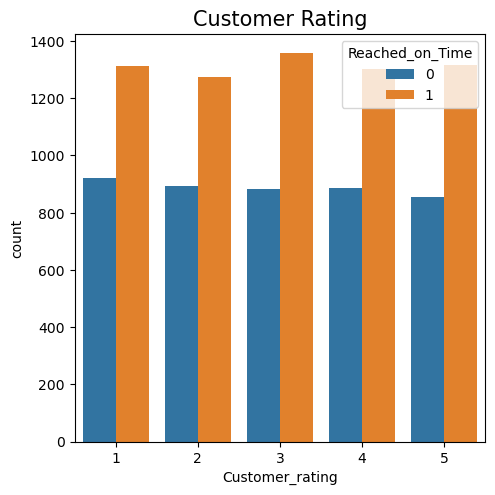

In [52]:
plt.figure(figsize=(18, 18))
plt.subplot(3, 3, 4)
sns.countplot(x='Customer_rating', hue='Reached_on_Time',  data=df)
plt.title('Customer Rating', fontsize=15)
plt.show()

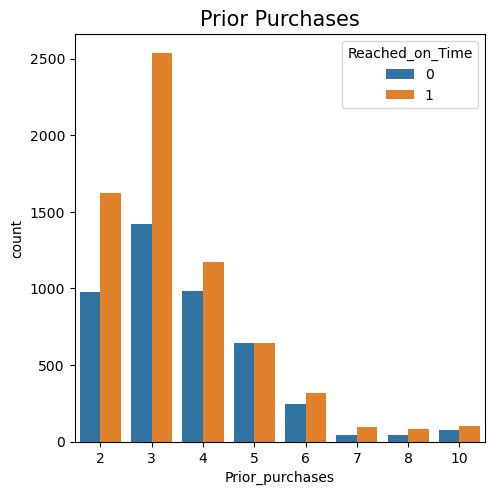

In [53]:
plt.figure(figsize=(18, 18))
plt.subplot(3, 3, 5)
sns.countplot(x='Prior_purchases', hue='Reached_on_Time',  data=df)
plt.title('Prior Purchases', fontsize=15)
plt.show()

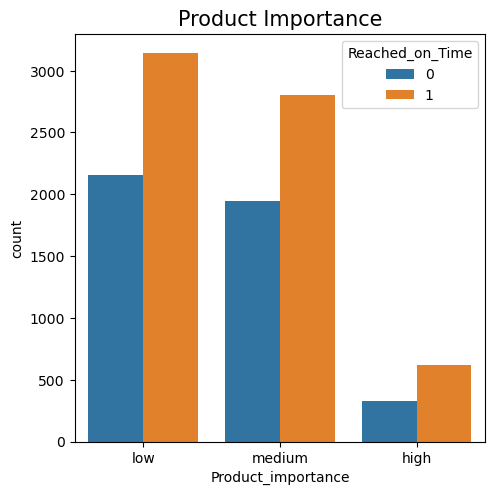

In [54]:
plt.figure(figsize=(18, 18))
plt.subplot(3, 3, 6)
sns.countplot(x='Product_importance', hue='Reached_on_Time',  data=df)
plt.title('Product Importance', fontsize=15)
plt.show()

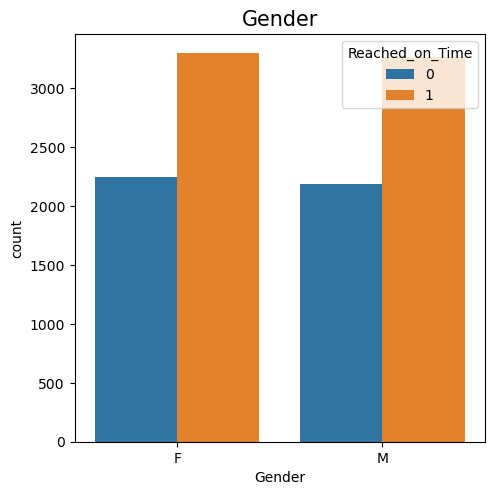

In [55]:
plt.figure(figsize=(18, 18))
plt.subplot(3, 3, 7)
sns.countplot(x='Gender', hue='Reached_on_Time',  data=df)
plt.title('Gender', fontsize=15)
plt.show()

ValueError: Could not interpret input '2.	Cost_of_the_Product'

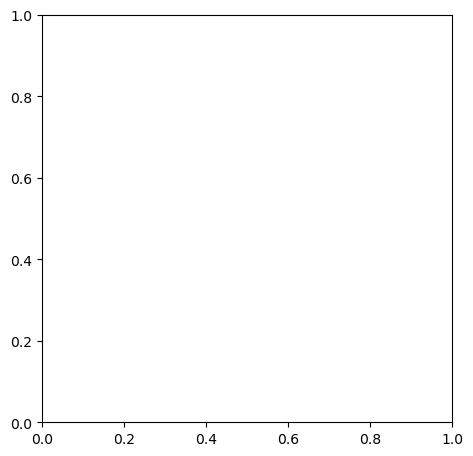

In [71]:
plt.figure(figsize=(18, 18))
plt.subplot(3, 3, 7)
sns.countplot(x='2.	Cost_of_the_Product', hue='Reached_on_Time',  data=df)
plt.title('Gender', fontsize=15)
plt.show()

In [11]:
print(data.groupby(["Reached_on_Time"])["Prior_purchases"].mean())

NameError: name 'data' is not defined

In [22]:
#use of this only in writing part

In [70]:
quali_cols = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
for i, col in enumerate(quali_cols):
    print(f"""For the column {col} the frequency table looks like this:\n\n\n{pd.DataFrame(df[col].value_counts())}\n""")

For the column Customer_care_calls the frequency table looks like this:


   Customer_care_calls
4                 3557
3                 3217
5                 2328
6                 1013
2                  638
7                  246

For the column Customer_rating the frequency table looks like this:


   Customer_rating
3             2239
1             2235
4             2189
5             2171
2             2165

For the column Cost_of_the_Product the frequency table looks like this:


     Cost_of_the_Product
245                  110
257                  109
260                  106
254                  101
264                  100
..                   ...
107                    5
99                     5
120                    5
96                     5
122                    4

[215 rows x 1 columns]

For the column Prior_purchases the frequency table looks like this:


    Prior_purchases
3              3955
2              2599
4              2155
5              1287
6         

In [16]:
for col in quali_cols:
    print(pd.crosstab(df[col], df["Reached.on.Time_Y.N"], normalize="index"))
    print("\n\n")

Reached.on.Time_Y.N         0         1
Warehouse_block                        
A                    0.413530  0.586470
B                    0.397709  0.602291
C                    0.403164  0.596836
D                    0.402399  0.597601
F                    0.401528  0.598472



Reached.on.Time_Y.N         0         1
Mode_of_Shipment                       
Flight               0.398424  0.601576
Road                 0.411932  0.588068
Ship                 0.402439  0.597561



Reached.on.Time_Y.N         0         1
Product_importance                     
high                 0.350211  0.649789
low                  0.407212  0.592788
medium               0.409550  0.590450



Reached.on.Time_Y.N         0         1
Gender                                 
F                    0.405591  0.594409
M                    0.400990  0.599010



Reached.on.Time_Y.N         0         1
Customer_rating                        
1                    0.412528  0.587472
2                    0.41200

In [122]:
quant_col = ['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases','Discount_offered', 'Weight_in_gms']
quant_stats = df[quant_col].agg(["count","mean","median","min", "max", "std", "var",])
quant_stats = quant_stats.append(df[quant_col].mode().rename(index={0:"mode"}))
quant_stats

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
count,10999.000000,10999.000000,10999.000000,10999.000000,1.099900e+04
mean,4.054459,210.196836,3.567597,13.373216,3.634017e+03
median,4.000000,214.000000,3.000000,7.000000,4.149000e+03
min,2.000000,96.000000,2.000000,1.000000,1.001000e+03
max,7.000000,310.000000,10.000000,65.000000,7.846000e+03
std,1.141490,48.063272,1.522860,16.205527,1.635377e+03
var,1.302999,2310.078091,2.319103,262.619108,2.674459e+06
mode,4.000000,245.000000,3.000000,10.000000,4.883000e+03


[Text(0.5, 0, 'Warehouse_block'), Text(0, 0.5, 'Total')]

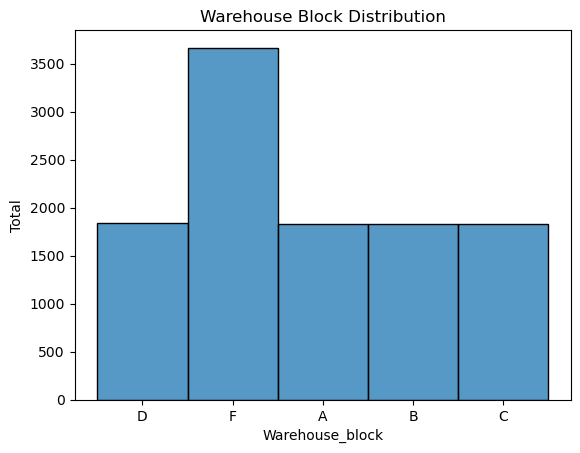

In [29]:
gra=sns.histplot(x=df["Warehouse_block"])
gra.set_title("Warehouse Block Distribution")
gra.set(xlabel='Warehouse_block', ylabel='Total')

[Text(0.5, 0, 'Mode_of_Shipment'), Text(0, 0.5, 'Total')]

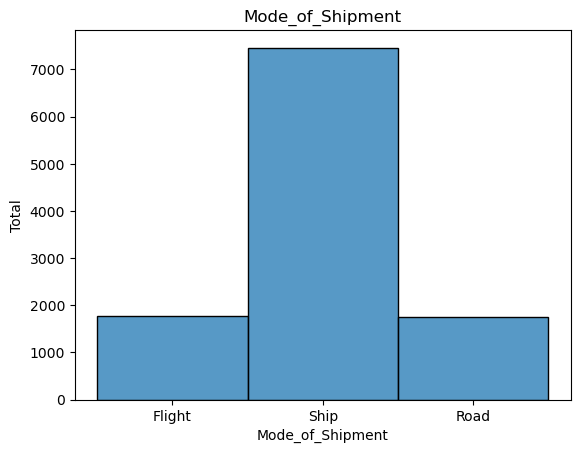

In [30]:
gra=sns.histplot(x=df["Mode_of_Shipment"])
gra.set_title("Mode_of_Shipment")
gra.set(xlabel='Mode_of_Shipment', ylabel='Total')

[Text(0.5, 0, 'Customer_care_calls'), Text(0, 0.5, 'Total')]

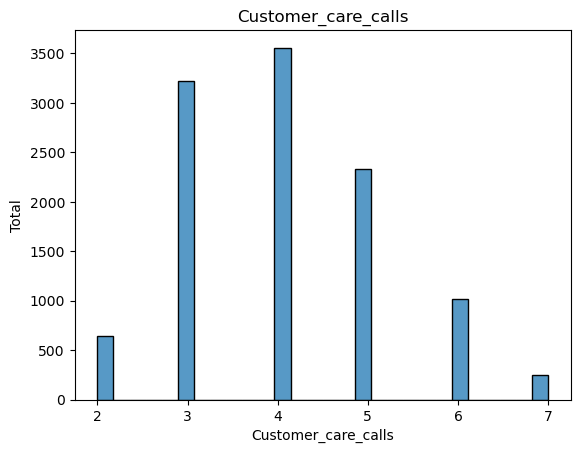

In [35]:
gra=sns.histplot(x=df["Customer_care_calls"])
gra.set_title("Customer_care_calls")
gra.set(xlabel='Customer_care_calls', ylabel='Total')

[Text(0.5, 0, 'Customer_rating'), Text(0, 0.5, 'Total')]

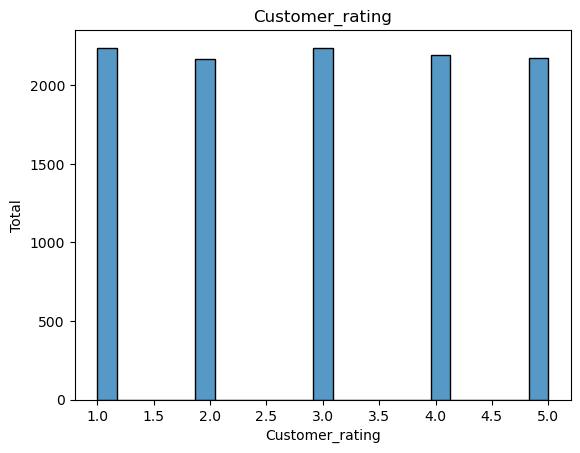

In [36]:
gra=sns.histplot(x=df["Customer_rating"])
gra.set_title("Customer_rating")
gra.set(xlabel='Customer_rating', ylabel='Total')

[Text(0.5, 0, 'Cost_of_the_Product'), Text(0, 0.5, 'Total')]

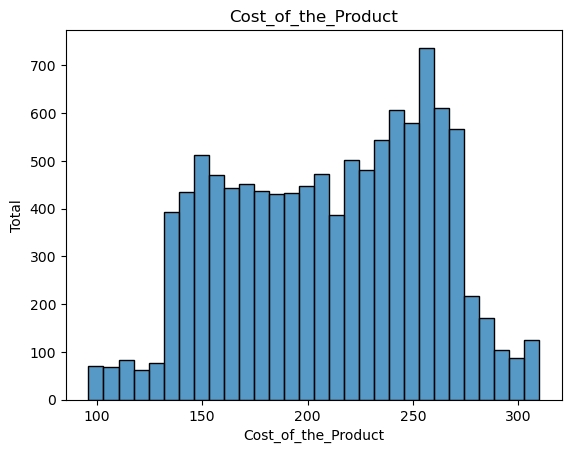

In [37]:
gra=sns.histplot(x=df["Cost_of_the_Product"])
gra.set_title("Cost_of_the_Product")
gra.set(xlabel='Cost_of_the_Product', ylabel='Total')

[Text(0.5, 0, 'Prior_purchases'), Text(0, 0.5, 'Total')]

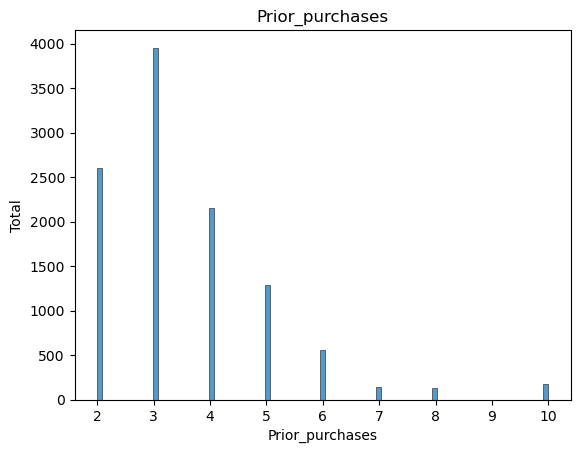

In [9]:
gra=sns.histplot(x=df["Prior_purchases"])
gra.set_title("Prior_purchases")
gra.set(xlabel='Prior_purchases', ylabel='Total')